In [4]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [5]:
#Load in the data
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0# original values are 0 to 255 so we normalize range between 0to 1
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [9]:
#Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [10]:
#compile the model
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#Train the model
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2985 - accuracy: 0.9135 - val_loss: 0.1373 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1428 - accuracy: 0.9572 - val_loss: 0.0957 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1074 - accuracy: 0.9678 - val_loss: 0.0838 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0870 - accuracy: 0.9722 - val_loss: 0.0790 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9763 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0637 - accuracy: 0.9792 - val_loss: 0.0728 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0567 - accuracy: 0.9819 - val_loss: 0.0768 - val_accu

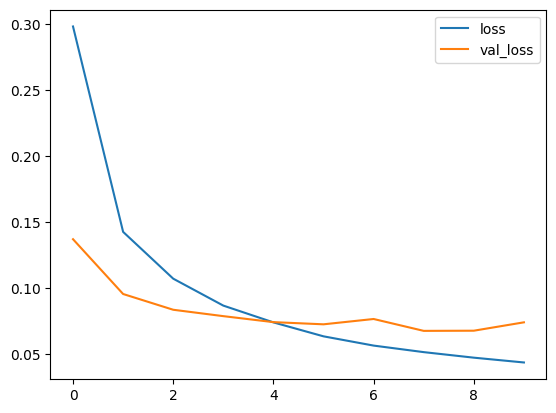

In [12]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

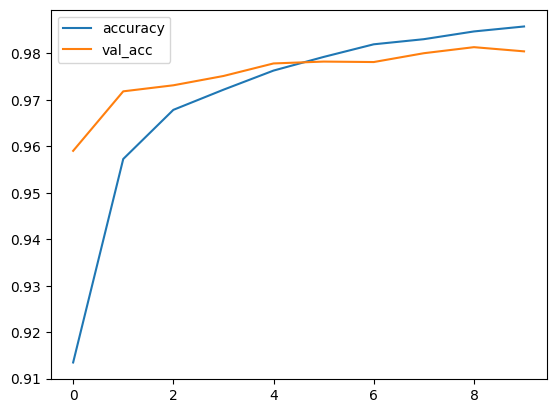

In [13]:
#plot the accuracy
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label="val_acc")
plt.legend()

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9804


[0.07427927106618881, 0.980400025844574]

313/313 [==============================] - 1s 3ms/step
Confusion matrix,without normalization
[[ 973    0    0    1    0    3    1    1    1    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   2    1 1013    1    1    0    2    5    7    0]
 [   1    0    1  989    0   12    0    4    2    1]
 [   1    0    4    0  963    0    3    2    0    9]
 [   3    0    0    5    2  878    2    0    2    0]
 [   6    2    1    1    6    9  928    1    4    0]
 [   3    4    9    3    0    0    0 1004    2    3]
 [   5    1    1    2    4    7    0    3  948    3]
 [   2    3    0    3    7    4    0    6    1  983]]


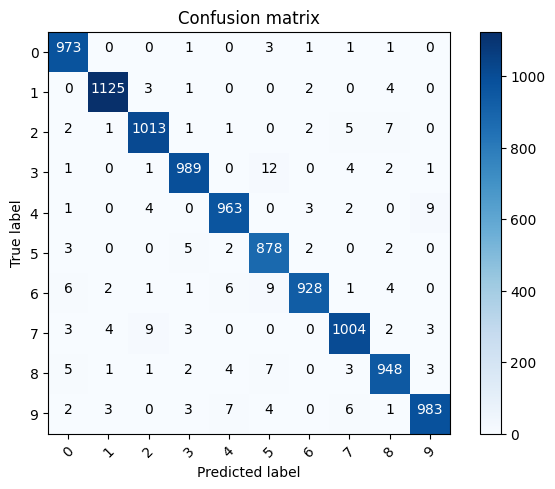

In [26]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,
                           normalize=False,
                           title="Confusion matrix",
                           cmap=plt.cm.Blues):

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix,without normalization')
  print(cm)

  plt.imshow(cm,interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

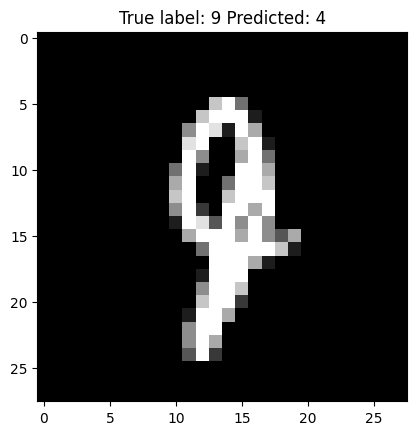

In [37]:
#Show some misclassified examples
misclassified_idx=np.where(p_test !=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i],p_test[i]));